In [8]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import math

In [9]:
schedules_results_dir = "/Users/anafiallo/Documents/MEng CES/howland-research/experiments/pp_WHOI_lidar_WLS7-436_2016_11_19__21_28_34_h=107m_Tmin=1_Tmax=899_degThreshold=0.0_nacelleDegRotSpeed=0.0/"

In [10]:
schedules_path = os.path.join(schedules_results_dir, "all_schedules_df.pickle")
with open(schedules_path, "rb") as f:
    schedules_df_list = pickle.load(f)


In [15]:
schedules_df_list[0].columns

Index(['Interval', 'T_initial', 'T_final',
       'Perfect Preview Wind Direction (PPWD) (phi(t))',
       'Low-pass-filter of PPWD (mean phi)', 'Nacelle position (theta(t))',
       'Delta Degree', 'Nacelle Position Update (T/F)',
       'Nacelle Repositioning Duration (s)', 'Start datetime', 'End datetime',
       'Month', 'Day', 'Hour', 'Minute', 'Season', 'Period of Day'],
      dtype='object')

In [14]:
T_range = [i for i in range(1,900)]

Text(0.5, 0, 'T time horizon (s)')

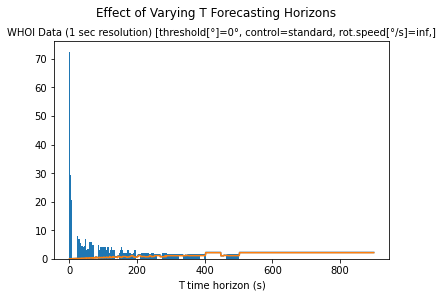

In [18]:
mean_yaw_errors =[]
std_dev_yaw_errors = []
duties = []
for schedule in schedules_df_list:
    duty_i = schedule["Nacelle Position Update (T/F)"].sum()/len(schedule["Hour"].unique())
    mean_yew_error_i = np.mean(schedule["Delta Degree"].values.mean())
    std_dev_yaw_error_i = np.std(schedule["Delta Degree"].values.mean())
    mean_yew_error_i = math.asin(mean_yew_error_i)*180/math.pi
    std_dev_yaw_error_i = math.asin(std_dev_yaw_error_i)*180/math.pi
    duties.append(duty_i)
    mean_yaw_errors.append(mean_yew_error_i)
    std_dev_yaw_errors.append(std_dev_yaw_error_i)
    
plt.bar(T_range, duties)
plt.plot(T_range, mean_yaw_errors,)
plt.plot(T_range, std_dev_yaw_errors)

plt.suptitle(f"Effect of Varying T Forecasting Horizons", y=1, fontsize=12)
plt.title(f"WHOI Data (1 sec resolution) [threshold[°]=0°, control=standard, rot.speed[°/s]=inf,]", fontsize=10)
plt.xlabel("T time horizon (s)")


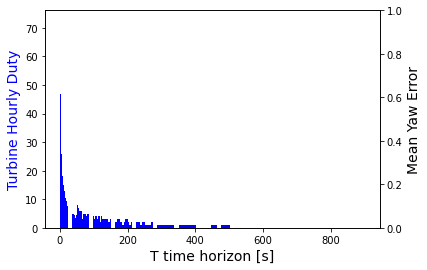

In [24]:
fig,ax = plt.subplots()
# make a plot
ax.bar(T_range,
        duties,
        color="blue", )
# set x-axis label
ax.set_xlabel("T time horizon [s]", fontsize = 14)
# set y-axis label
ax.set_ylabel("Turbine Hourly Duty",
              color="blue",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
# ax2.plot(T_range, mean_yaw_errors,color="black",marker="o")
ax2.set_ylabel("Mean Yaw Error",color="black",fontsize=14)
plt.show()

In [22]:

# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            # format='jpeg',
            # dpi=100,
            # bbox_inches='tight')